<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook contains an excerpt from the [Python Programming and Numerical Methods - A Guide for Engineers and Scientists](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9), the content is also available at [Berkeley Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html).*

*The copyright of the book belongs to Elsevier. We also have this interactive book online for a better learning experience. The code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work on [Elsevier](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9) or [Amazon](https://www.amazon.com/Python-Programming-Numerical-Methods-Scientists/dp/0128195495/ref=sr_1_1?dchild=1&keywords=Python+Programming+and+Numerical+Methods+-+A+Guide+for+Engineers+and+Scientists&qid=1604761352&sr=8-1)!*

<!--NAVIGATION-->
< [24.3 Fast Fourier Transform (FFT)](chapter24.03-Fast-Fourier-Transform.ipynb) | [Contents](Index.ipynb) | [24.5 Summary and Problems](chapter24.05-Summary-and-Problems.ipynb) >

# FFT in Python

In Python, there are very mature FFT functions both in *numpy* and _scipy_. In this section, we will take a look of both packages and see how we can easily use them in our work. Let's first generate the signal as before. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

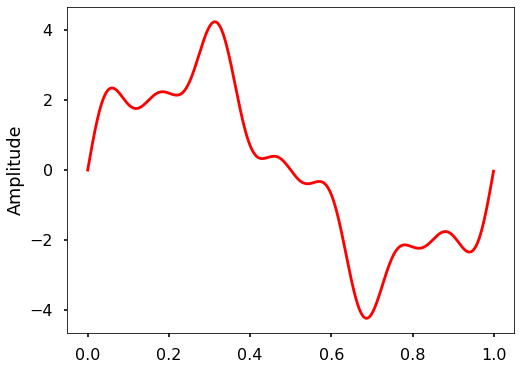

In [2]:
# sampling rate
sr = 2000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

## FFT in Numpy

**EXAMPLE:** Use *fft* and _ifft_ function from *numpy* to calculate the FFT amplitude spectrum and inverse FFT to obtain the original signal. Plot both results. Time the _fft_ function using this 2000 length signal. 

/Users/qingkaikong/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
/Users/qingkaikong/miniconda3/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


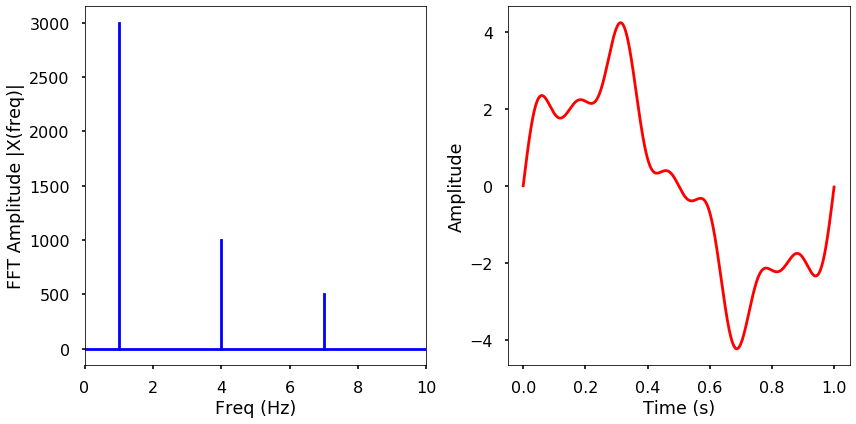

In [3]:
from numpy.fft import fft, ifft

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [4]:
%timeit fft(x)

36.2 µs ± 775 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## FFT in Scipy

**EXAMPLE:** Use *fft* and _ifft_ function from *scipy* to calculate the FFT amplitude spectrum and inverse FFT to obtain the original signal. Plot both results. Time the _fft_ function using this 2000 length signal. 

/Users/qingkaikong/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


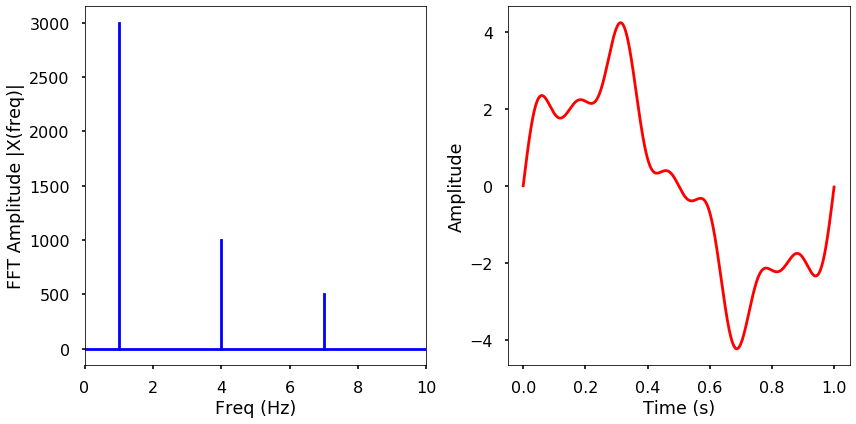

In [5]:
from scipy.fftpack import fft, ifft

X = fft(x)

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [6]:
%timeit fft(x)

14.8 µs ± 471 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Now we can see that the built-in fft functions are much faster and easy to use, especially for the scipy version. Here is the results for comparison:

* Implemented DFT: ~120 ms
* Implemented FFT: ~16 ms
* Numpy FFT: ~40 µs
* Scipy FFT: ~12 µs

## More examples

Let us see some more examples how to use FFT in real-world applications. 

###  Electricity demand in California

First, we will explore the electricity demand from California from 2019-11-30 to 2019-12-30. You can download data from [U.S. Energy Information Administration](https://www.eia.gov/beta/electricity/gridmonitor/dashboard/electric_overview/US48/US48). Here, I have already downloaded the data, therefore, we will use it directly. 

The electricity demand data from California is stored in '930-data-export.csv' in 3 columns. Remember we learned how to read CSV file using `numpy`. Here, we will use another package - `pandas`, which is a very popular package to deal with time series data. We will not teach you this package here, as an exercise, you should learn how to use it by yourself. Let us read in the data first. 

In [7]:
import pandas as pd

The `read_csv` function will read in the CSV file. Pay attention to the `parse_dates` parameter, which will find the date and time in column one. The data will be read into a pandas `DataFrame`, we use `df` to store it. Then we will change the header in the original file to something easier to use. 

In [8]:
df = pd.read_csv('./data/930-data-export.csv', 
                 delimiter=',', parse_dates=[1])
df.rename(columns={'Timestamp (Hour Ending)':'hour',
                   'Total CAL Demand (MWh)':'demand'},
          inplace=True)

We can plot the data and see how the electricity demand is changing over time. 

/Users/qingkaikong/miniconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


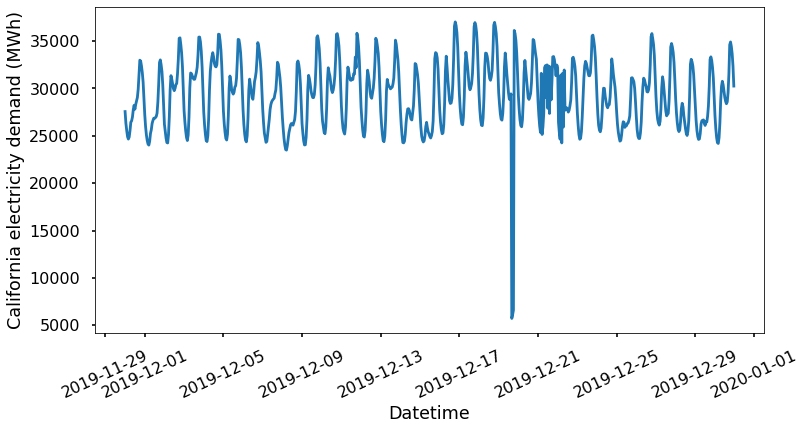

In [9]:
plt.figure(figsize = (12, 6))
plt.plot(df['hour'], df['demand'])
plt.xlabel('Datetime')
plt.ylabel('California electricity demand (MWh)')
plt.xticks(rotation=25) 
plt.show()

From the plotted time series, it is hard to tell there are some patterns behind the data. Let us transform the data into frequency domain and see if there is anything interesting. 

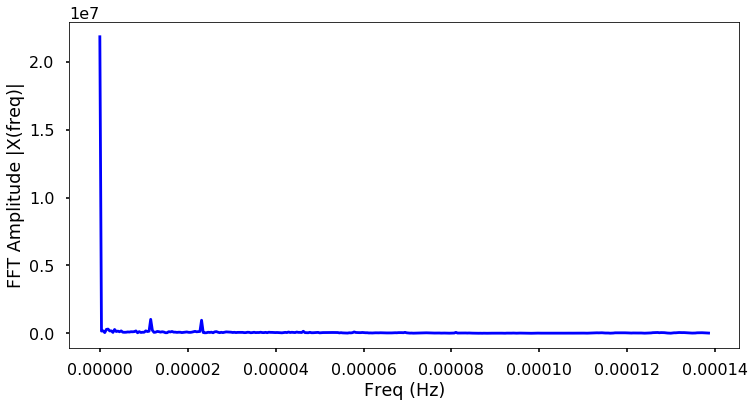

In [10]:
X = fft(df['demand'])
N = len(X)
n = np.arange(N)
# get the sampling rate
sr = 1 / (60*60)
T = N/sr
freq = n/T 

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

We see some clear peaks in the FFT amplitude figure, but it is hard to tell what are they in terms of frequency. Let us plot the results using hours and highlight some of the hours associated with the peaks.

/Users/qingkaikong/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


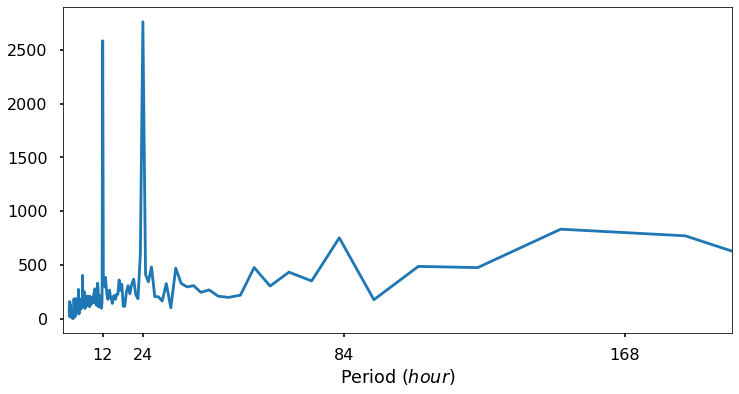

In [11]:
# convert frequency to hour
t_h = 1/f_oneside / (60 * 60)

plt.figure(figsize=(12,6))
plt.plot(t_h, np.abs(X[:n_oneside])/n_oneside)
plt.xticks([12, 24, 84, 168])
plt.xlim(0, 200)
plt.xlabel('Period ($hour$)')
plt.show()

We can now see some interesting patterns, i.e. three peaks associate with 12, 24, and 84 hours. These peaks mean that we see some repeating signal every 12, 24 and 84 hours. This makes sense and corresponding to our human activity pattern. The FFT can help us to understand some of the repeating signal in our physical world. 

### Filtering a signal using FFT 

Filtering is a process in signal processing to remove some unwanted part of the signal within certain frequency range. There are low-pass filter, which tries to remove all the signal above certain cut-off frequency, and high-pass filter, which does the opposite. Combining low-pass and high-pass filter, we will have bandpass filter, which means we only keep the signals within a pair of frequencies. Using FFT, we can easily do this. Let us play with the following example to illustrate the basics of a band-pass filter. Note: we just want to show the idea of filtering using very basic operations, in reality, the filtering process are much more sophisticated.  

**EXAMPLE:** We can use the signal we generated at the beginning of this section (the mixed sine waves with 1, 4, and 7 Hz), and high-pass filter this signal at 6 Hz. Plot the filtered signal and the FFT amplitude before and after the filtering.

In [12]:
from scipy.fftpack import fftfreq

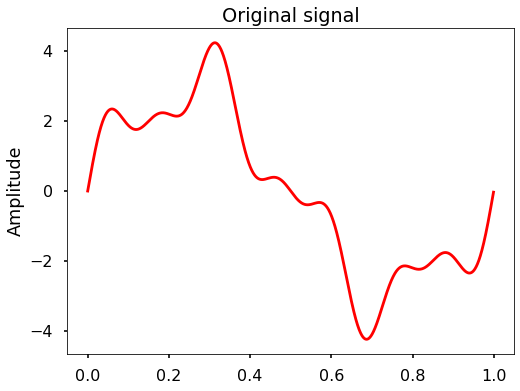

In [13]:
plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.title('Original signal')
plt.show()

/Users/qingkaikong/miniconda3/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


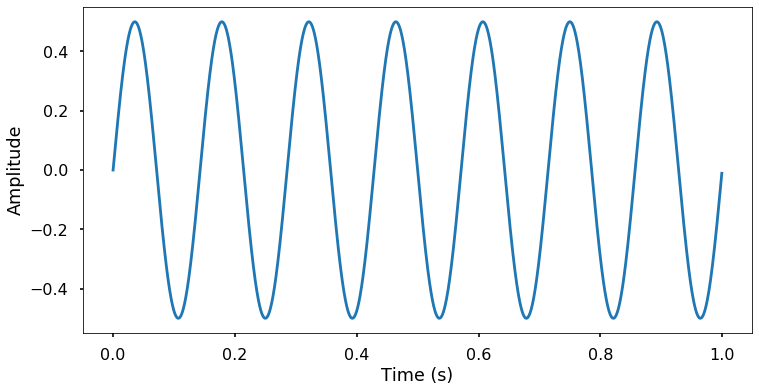

/Users/qingkaikong/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/qingkaikong/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


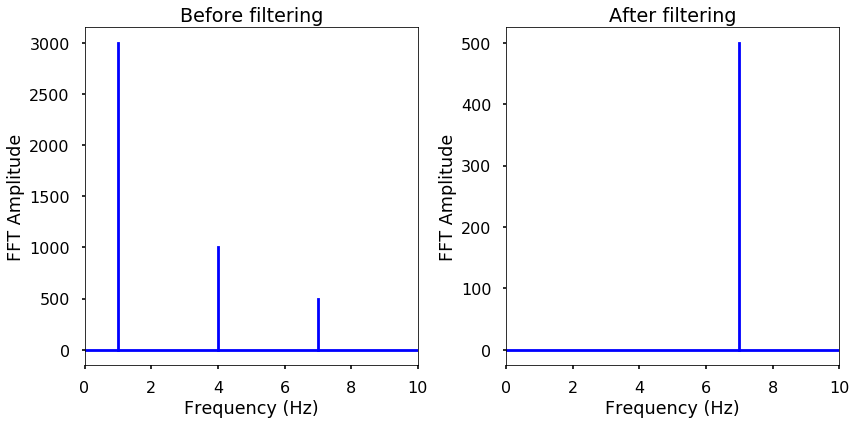

In [14]:
# FFT the signal
sig_fft = fft(x)
# copy the FFT results
sig_fft_filtered = sig_fft.copy()

# obtain the frequencies using scipy function
freq = fftfreq(len(x), d=1./2000)

# define the cut-off frequency
cut_off = 6

# high-pass filter by assign zeros to the 
# FFT amplitudes where the absolute 
# frequencies smaller than the cut-off 
sig_fft_filtered[np.abs(freq) < cut_off] = 0

# get the filtered signal in time domain
filtered = ifft(sig_fft_filtered)

# plot the filtered signal
plt.figure(figsize = (12, 6))
plt.plot(t, filtered)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# plot the FFT amplitude before and after
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, np.abs(sig_fft), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('Before filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.subplot(122)
plt.stem(freq, np.abs(sig_fft_filtered), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('After filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.tight_layout()
plt.show()

From the above example, by assigning any absolute frequencies' FFT amplitude to zero, and returning back to time domain signal, we achieve a very basic high-pass filter in a few steps. You can try to implement a simple low-pass or bandpass filter by yourself. Therefore, FFT can help us get the signal we are interested in and remove the ones that are unwanted. 

There are also many amazing applications using FFT in science and engineering and we will leave you to explore by yourself. 

<!--NAVIGATION-->
< [24.3 Fast Fourier Transform (FFT)](chapter24.03-Fast-Fourier-Transform.ipynb) | [Contents](Index.ipynb) | [24.5 Summary and Problems](chapter24.05-Summary-and-Problems.ipynb) >